## Prepare Data

### import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Explore

In [2]:
# import dataset
df = pd.read_csv('courserafree.csv')
#view data info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            976 non-null    int64  
 1   url                   976 non-null    object 
 2   price                 950 non-null    object 
 3   institution           976 non-null    object 
 4   title                 976 non-null    object 
 5   skills you will gain  890 non-null    object 
 6   ratings               950 non-null    float64
 7   reviews               950 non-null    object 
 8   level type duration   976 non-null    object 
 9   Unnamed: 9            270 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 76.4+ KB


,Unnamed: 0,url,price,institution,title,skills you will gain,ratings,reviews,level type duration,Unnamed: 9
0,0,https://www.coursera.org/learn/indigenous-canada,Free,University of Alberta,Indigenous Canada,"Business Psychology, Communication, History, E...",4.8,(18.8k reviews),Mixed · Course · 1-3 Months,NaN
1,1,https://www.coursera.org/learn/financial-marke...,Free,Yale University,Financial Markets,"Business Psychology, Data Analysis, Market (Ec...",4.8,(22.5k reviews),Beginner · Course · 1-3 Months,NaN
2,2,https://www.coursera.org/learn/the-science-of-...,Free,Yale University,The Science of Well-Being,"Gratitude, Meditation, Planning, Mindfulness",4.9,(33.4k reviews),Mixed · Course · 1-3 Months,NaN
3,3,https://www.coursera.org/learn/sciwrite,Free,Stanford University,Writing in the Sciences,"Writing, Communication",4.9,(6.6k reviews),Beginner · Course · 1-3 Months,NaN
4,4,https://www.coursera.org/learn/introduction-ps...,Free,Yale University,Introduction to Psychology,"Business Psychology, Psychology, Psychologies,...",4.9,(23.3k reviews),Beginner · Course · 1-3 Months,NaN


In [3]:
#drops the listed columns
df.drop(columns = ['Unnamed: 0', 'Unnamed: 9'], inplace = True)
#drops all rows with null values
df.dropna(inplace = True)

Columns Unnamed: 0 & Unnamed: 9 were removed as the information in them were of no value. Unnamed: 0 is a repetition of the already listed index, while Unnamed: 9 contains images for each course. it also has a lot of null values so it is better for it to be removed.

In [4]:
## Data manipulation##
df['Course_level'] = df['level type duration'].str.split('·', expand = True)[0] #selects first value of split
df['Course_level'] = df['Course_level'] +' ' + 'course'

df['Duration'] = df['level type duration'].str.split('·', expand = True)[2] #selects second value of split

df['Reviews'] = df['reviews'].str.replace("(", "").str.replace(")", "") # removes parentheses from review column

df.drop(columns = ['level type duration', 'reviews'], inplace = True) # drops columns

From cell 2, **level type duration** contains two key details; the course level and the duration of the course. We would like to see them separatele, so we can make analysis with them.

Also,for the **reviews** column, the parentheses were removed, to make the rows cleaner. Finally, the columns that are not needed were removed, giving

In [5]:
print(df.price.nunique())# checks number of unique values
df.drop(columns = 'price', inplace = True) # drops column

1


Price has only one unique value and that is 'free', hence why it was removed.

In [6]:
# renames columns
df.rename(columns = {'url': 'URL', 'institution': 'Institution', 'title':'Course_Title', 'skills you will gain': 'Skills', 'ratings': 'Ratings'}, inplace = True)
df.head()

,URL,Institution,Course_Title,Skills,Ratings,Course_level,Duration,Reviews
0,https://www.coursera.org/learn/indigenous-canada,University of Alberta,Indigenous Canada,"Business Psychology, Communication, History, E...",4.8,Mixed course,1-3 Months,18.8k reviews
1,https://www.coursera.org/learn/financial-marke...,Yale University,Financial Markets,"Business Psychology, Data Analysis, Market (Ec...",4.8,Beginner course,1-3 Months,22.5k reviews
2,https://www.coursera.org/learn/the-science-of-...,Yale University,The Science of Well-Being,"Gratitude, Meditation, Planning, Mindfulness",4.9,Mixed course,1-3 Months,33.4k reviews
3,https://www.coursera.org/learn/sciwrite,Stanford University,Writing in the Sciences,"Writing, Communication",4.9,Beginner course,1-3 Months,6.6k reviews
4,https://www.coursera.org/learn/introduction-ps...,Yale University,Introduction to Psychology,"Business Psychology, Psychology, Psychologies,...",4.9,Beginner course,1-3 Months,23.3k reviews


So far, the following were performed on the dataset:

1. Expanded and created new columns to give us more insight and to make the dataset easier to read.
2. Removed unneccessary characters from columns
3. Dropped columns that included repeated information as other columns and those with one unique value. Lastly,
4. Renamed columns for uniformity and readability

In [7]:
# exporting the clean data to csv
df.to_csv('Clean_cousera_dataset.csv', index=False)

### Analysis

In [8]:
df1 = pd.read_csv('Clean_cousera_dataset.csv')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   URL           858 non-null    object 
 1   Institution   858 non-null    object 
 2   Course_Title  858 non-null    object 
 3   Skills        858 non-null    object 
 4   Ratings       858 non-null    float64
 5   Course_level  858 non-null    object 
 6   Duration      858 non-null    object 
 7   Reviews       858 non-null    object 
dtypes: float64(1), object(7)
memory usage: 53.8+ KB


### *Top 10 Instituitions offering free courses*

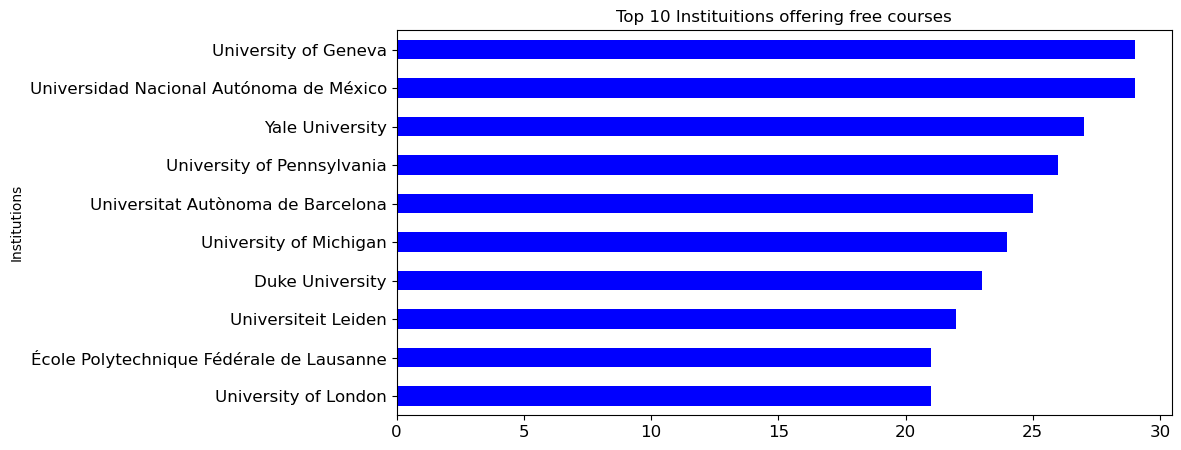

In [20]:
df1['Institution'].value_counts().sort_values().tail(10).plot(
    kind = 'barh', 
    color = 'blue',
    xlabel = 'Institutions', 
    title = "Top 10 Instituitions offering free courses", figsize=(10,5), fontsize = 12);

### *Most Rated Schools*

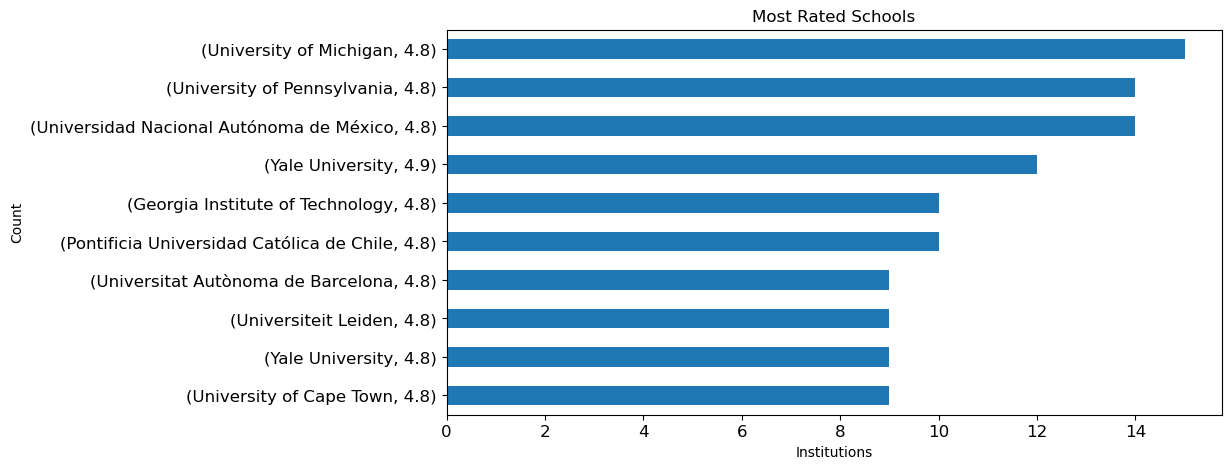

In [21]:
(
    df.groupby('Institution')['Ratings'].value_counts()
    .sort_values()
    .tail(10)
    .plot(kind = 'barh', figsize = (10, 5), fontsize = 12)
)
      
plt.xlabel('Institutions')
plt.ylabel('Count')
plt.title('Most Rated Schools');

### *Distribution of Course_levels*

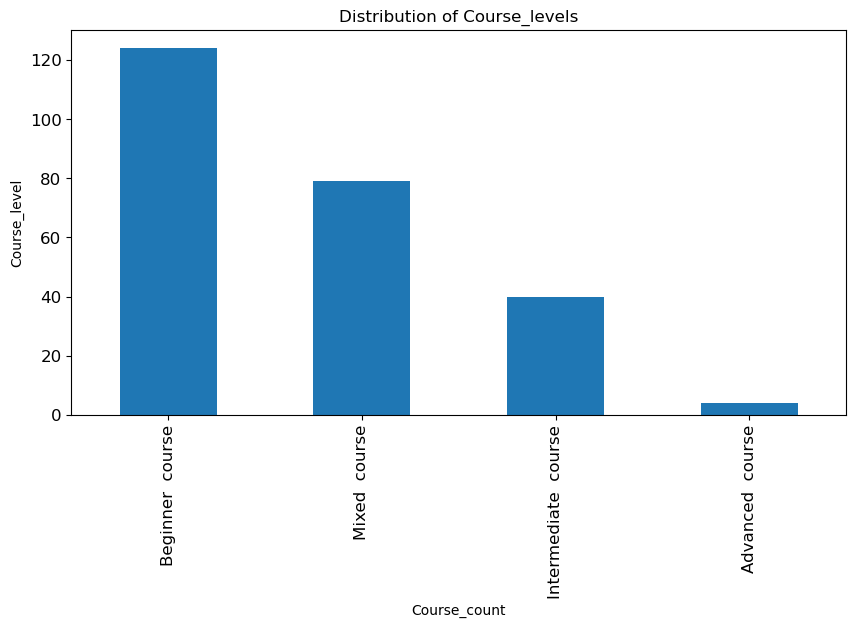

In [17]:
df1['Course_level'].value_counts().plot(kind = 'bar',
                                        xlabel = 'Course_count',
                                        ylabel = 'Course_level',
                                        title = 'Distribution of Course_levels',
                                        fontsize = 12, 
                                        figsize = (10, 5));

### *Distribution of Course_level for Top 10 Universities*

In [13]:
import plotly.express as px

In [18]:
top_unis = ['École Polytechnique Fédérale de Lausanne',
            'University of London','Universiteit Leiden',
            'Duke University','University of Michigan',
            'Universitat Autònoma de Barcelona',
            'University of Pennsylvania',
            'Yale University',
            'Universidad Nacional Autónoma de México',
            'University of Geneva']
mask = df1.Institution.isin(top_unis)
df1 = df1[mask]

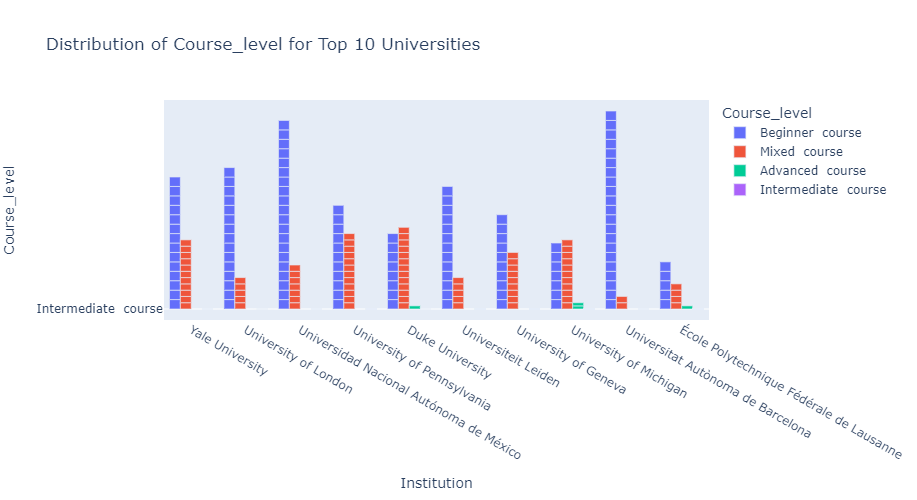

In [37]:
fig=px.bar(df1, 
           x = 'Institution', 
           y = 'Course_level', 
           color = 'Course_level',
           barmode = 'group',
           title = 'Distribution of Course_level for Top 10 Universities',
           width=1000,
           height=500 )
fig.show()

### *Distribution of Duration*

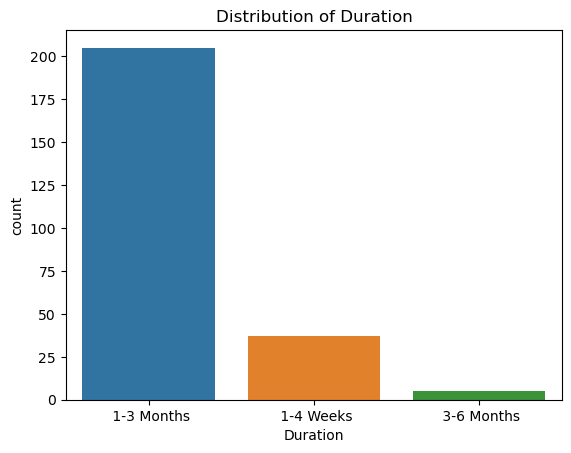

In [27]:
sns.countplot(df1['Duration'].sort_values())
plt.xlabel('Duration')
plt.title('Distribution of Duration');

# Conclusion

We started with a dataset with 976-rows and 10-cols. It constituted of (1) float64, (1) int64 and (8) object types. I proceeded to cleaning the and manipulation the data, which resulted to the new dataset **Clean_cousera_dataset.csv**. 

The new data now has, 858-rows, 8-cols. It has (1) float64, (7) object types. I then analysed the new data and explored the following:
* Top 10 Instituitions offering free courses
* Most Rated Schools
* Distribution of Course_levels
* Distribution of Course_level for Top 10 Universities
* Distribution of Duration